In [ ]:
from google.colab import drive
drive.mount('/content/drive')
root = '/content/drive/My Drive/Colab Notebooks/'
path = root+'water_potability.csv'

Mounted at /content/drive


In [ ]:
# Importing Numpy , Pandas , Matplot ,Model Selection packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv(path)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# checking the data is balanced or imbalanced 

In [ ]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
df.shape

(3276, 10)

In [ ]:
# checking the missing values in dataset  

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
# Filling the missing values in dataset 

In [ ]:
df["ph"]=df.fillna(df["ph"].mean())
df["Sulfate"]=df.fillna(df["ph"].mean())
df["Trihalomethanes"]=df.fillna(df["Trihalomethanes"].mean())

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
# checking the correlation 

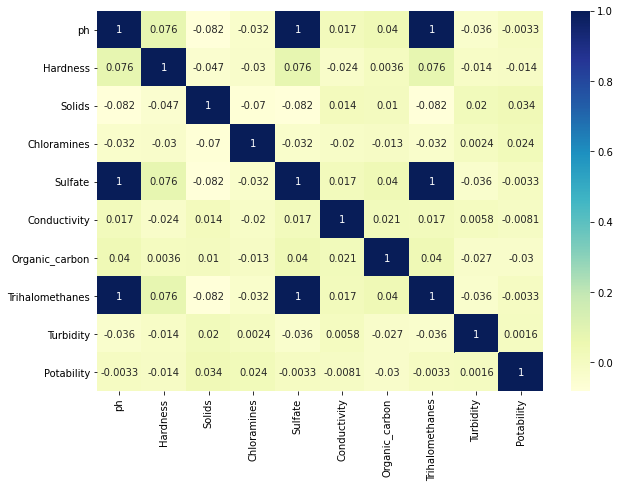

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [ ]:
# checking the skewness in dataset

In [ ]:
print(df.skew())

ph                 0.027796
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate            0.027796
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes    0.027796
Turbidity         -0.007817
Potability         0.450784
dtype: float64


In [ ]:
## solids feature is slightly right skewed. Rest of the features are normally distributed

In [ ]:
## Handling the imbalanced dataset  

In [ ]:
from sklearn.utils import resample
from sklearn.utils import shuffle
nonpotability=df[df["Potability"]==0]
nonpotability

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,7.080795,564.308654,10.379783,7.080795,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,3.716080,592.885359,15.180013,3.716080,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,8.099124,418.606213,16.868637,8.099124,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,8.316766,363.266516,18.436524,8.316766,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,9.092223,398.410813,11.558279,9.092223,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3112,6.616731,195.096968,34277.760400,7.632639,6.616731,417.465080,13.432557,6.616731,3.622379,0
3113,7.734569,230.919506,21776.594455,6.908591,7.734569,395.114961,15.033557,7.734569,3.821456,0
3114,6.971577,185.906938,27959.987873,7.214510,6.971577,414.067354,19.882917,6.971577,3.226349,0
3115,4.709187,179.141018,22291.418577,6.774276,4.709187,371.264843,18.186801,4.709187,3.860084,0


In [ ]:
potable=df[df["Potability"]==1]
potable

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,9.445130,592.659021,8.606397,9.445130,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,9.024845,451.143481,14.770863,9.024845,3.985251,1
252,7.080795,169.974849,23403.637304,8.519730,7.080795,475.573562,12.924107,7.080795,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,6.800119,376.456593,11.432466,6.800119,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,7.174135,315.549900,14.533510,7.174135,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,4.668102,526.424171,13.894419,4.668102,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,7.808856,392.449580,19.903225,7.808856,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,9.419510,432.044783,11.039070,9.419510,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,5.126763,402.883113,11.168946,5.126763,4.708658,1


In [ ]:
df_resampled=resample(potable,replace=True,n_samples=1998)
df=pd.concat([nonpotability,df_resampled])
df=shuffle(df)
df.Potability.value_counts()

1    1998
0    1998
Name: Potability, dtype: int64

In [ ]:
# Since the values inside the dataset are in different scale using standard scalar to scale down values in single scale values  

In [ ]:
y=df["Potability"]
x=df.drop(["Potability"],axis=1)

scalar=StandardScaler() 
x=scalar.fit_transform(x)


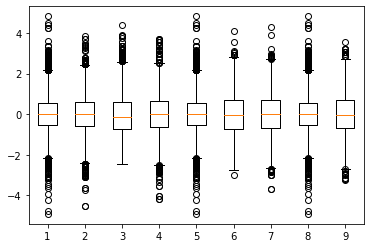

In [ ]:
plt.boxplot(x)
plt.show()

In [ ]:
# Splitting the dataset into train and test 

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# Finding the best model for this dataset

In [ ]:
compare={"KNN":KNeighborsClassifier(),"DTC":DecisionTreeClassifier(),"RFC":RandomForestClassifier(),"Adaboost":AdaBoostClassifier(),"xgboost":XGBClassifier(),
         "Gradientboost":GradientBoostingClassifier()}
results_score={}

for model_name,model in compare.items():
  model.fit(x_train,y_train)
  results_score[model_name]=model.score(x_test,y_test)


In [ ]:
for i in results_score.items():
  print(i)


('KNN', 0.66)
('DTC', 0.76375)
('RFC', 0.83)
('Adaboost', 0.55875)
('xgboost', 0.61625)
('Gradientboost', 0.635)


In [ ]:
# Random forest gives the highest score .best model is random forest

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy of random forest is",accuracy)

accuracy of random forest is 0.7975


In [ ]:
# Finding the best parameters using GridSearch CV

In [ ]:
param_RFC={'n_estimators':[100,200, 350, 500,1000], 'min_samples_leaf':[2, 10, 30]}
gr_reg =GridSearchCV(RandomForestClassifier(),param_grid=param_RFC,cv=5)
gr_reg.fit(x_train,y_train)
print("Best parameters for Random Forest:", gr_reg.best_params_)

Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}


In [ ]:
# Accuracy is slightly improved after passing the best parameters in model

In [ ]:
model=RandomForestClassifier(n_estimators=1000,min_samples_leaf=2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy of random forest is",accuracy)

accuracy of random forest is 0.79875
